In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import mplsoccer
from scipy.spatial import ConvexHull
from scipy import stats

In [2]:
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',50)

In [3]:
eventsDataLaLiga1920 = pd.read_csv('D:\Analytics\Football\MAS - Masterclass\Data\matchwise_events_data_updated.csv',low_memory=False)

In [4]:
eventsDataLaLiga1920['startX'] = eventsDataLaLiga1920['location'].str.split(', ', expand=True)[0].str[1:].apply(pd.to_numeric)
eventsDataLaLiga1920['startY'] = eventsDataLaLiga1920['location'].str.split(', ', expand=True)[1].str[:-1].apply(pd.to_numeric)

In [5]:
matchID = 303400

In [6]:
df = eventsDataLaLiga1920[eventsDataLaLiga1920['match_id']==matchID]

In [7]:
df = df.fillna(0)

In [8]:
df[['team.id','team.name']].drop_duplicates()

,team.id,team.name
19781,207,Valencia
19782,217,Barcelona


In [9]:
df = df[df['team.id']==217]

In [10]:
df = df[['index','minute','second','team.id','player.id','player.name','type.id','type.name','startX','startY','jersey_number']]

In [11]:
df.reset_index(inplace=True, drop=True)

In [12]:
df['player.id'] = df['player.id'].astype(int)
df['jersey_number'] = df['jersey_number'].astype(int)

In [13]:
df

,index,minute,second,team.id,player.id,player.name,type.id,type.name,startX,startY,jersey_number
0,2,0,0,217,0,0,35,Starting XI,0.0,0.0,0
1,4,0,0,217,0,0,18,Half Start,0.0,0.0,0
2,5,0,1,217,5487,Antoine Griezmann,30,Pass,61.0,40.1,17
3,6,0,2,217,5203,Sergio Busquets i Burgos,42,Ball Receipt*,50.7,42.3,5
4,7,0,2,217,5203,Sergio Busquets i Burgos,43,Carry,50.7,42.3,5
...,...,...,...,...,...,...,...,...,...,...,...
2801,4043,93,54,217,5492,Samuel Yves Umtiti,42,Ball Receipt*,25.8,27.1,23
2802,4044,93,54,217,5492,Samuel Yves Umtiti,43,Carry,25.8,27.1,23
2803,4045,93,56,217,5492,Samuel Yves Umtiti,30,Pass,42.8,16.7,23
2804,4046,93,58,217,5211,Jordi Alba Ramos,42,Ball Receipt*,56.7,2.5,18


In [14]:
playerIDs = df['player.id'].unique()
jerseyNumbers = df['jersey_number'].unique()

In [15]:
playerIDs

array([    0,  5487,  5203,  8118,  6379,  5213,  5492,  5211, 20055,
       11392,  5503, 30756,  8206,  5470, 24949])

In [16]:
starterIDs = playerIDs[1:12]
starterJerseys = jerseyNumbers[1:12]

In [17]:
df[['player.id','player.name']].drop_duplicates()

,player.id,player.name
0,0,0
2,5487,Antoine Griezmann
3,5203,Sergio Busquets i Burgos
6,8118,Frenkie de Jong
9,6379,Sergi Roberto Carnicer
12,5213,Gerard Piqué Bernabéu
15,5492,Samuel Yves Umtiti
18,5211,Jordi Alba Ramos
47,20055,Marc-André ter Stegen
83,11392,Arthur Henrique Ramos de Oliveira Melo


## Player-wise

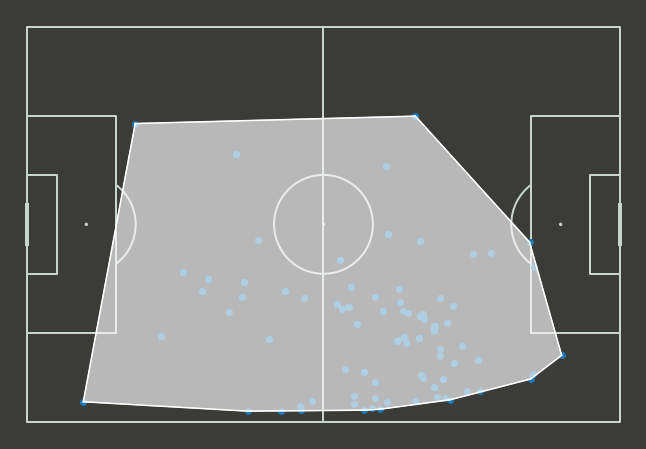

In [25]:
fig, ax = plt.subplots(figsize=(16,8))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch = mplsoccer.Pitch(pitch_type='statsbomb', orientation='horizontal',pitch_color='#3b3b38',
                        line_color='#c7d5cc', figsize=(16,11), 
                        constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)

player1_df = df[df['player.id']==8118]
player1_df = player1_df[player1_df['type.id']==30]

player1_df = player1_df[np.abs(stats.zscore(player1_df[['startX','startY']])<1)]

points = player1_df[['startX','startY']].values

hull = ConvexHull(player1_df[['startX','startY']])

plt.scatter(player1_df['startX'],player1_df['startY'])

for i in hull.simplices:
    plt.plot(points[i,0],points[i,1], 'white')
    plt.fill(points[hull.vertices,0],points[hull.vertices,1],
             c='white',alpha=0.1)
    
    

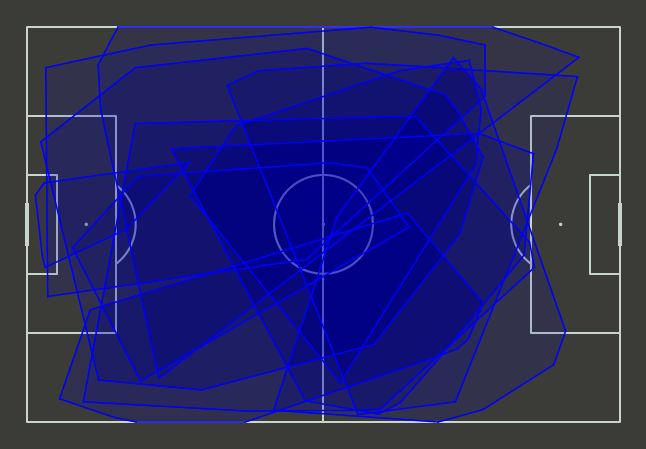

In [66]:
fig, ax = plt.subplots(figsize=(16,8))
fig.set_facecolor('#3b3b38')
ax.patch.set_facecolor('#3b3b38')

pitch = mplsoccer.Pitch(pitch_type='statsbomb', orientation='horizontal',pitch_color='#3b3b38',
                        line_color='#c7d5cc', figsize=(16,11), 
                        constrained_layout=True, tight_layout=False)
pitch.draw(ax=ax)

for player in starterIDs:
    team_df = df[df['player.id']==player]
    team_df = team_df[team_df['type.id']==30]
    team_df = team_df[np.abs(stats.zscore(team_df[['startX','startY']])<.2)]
    points = team_df[['startX','startY']].values
    
    try:
        hull = ConvexHull(team_df[['startX','startY']])
    except:
        pass
    
    try:
        for i in hull.simplices:
            plt.plot(points[i,0],points[i,1], 'blue')
            plt.fill(points[hull.vertices,0],points[hull.vertices,1],
                     c='blue',alpha=0.01)
    except:
        pass